## Final project for 254


### Import nessesary packages

In [ ]:
import io
import pandas as pd

import numpy as np 
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

import nltk
from nltk.data import find
import nltk, re, pprint
from nltk import word_tokenize
from nltk import tokenize

from sklearn.manifold import TSNE
import string
from urllib.request import urlopen

import os
import string
from urllib.request import urlopen

## Vizualise
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt


### load the recipies csv from google drive

In [ ]:
# load the csv into a df
df = pd.read_csv('RAW_recipes.csv')
df.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [ ]:
df_env = pd.read_csv('enviromental.csv')


In [ ]:
df.loc[7]['ingredients']

"['pork spareribs', 'soy sauce', 'fresh garlic', 'fresh ginger', 'chili powder', 'fresh coarse ground black pepper', 'salt', 'fresh cilantro leaves', 'tomato sauce', 'brown sugar', 'yellow onion', 'white vinegar', 'honey', 'a.1. original sauce', 'liquid smoke', 'cracked black pepper', 'cumin', 'dry mustard', 'cinnamon sticks', 'orange, juice of', 'mirin', 'water']"

In [ ]:
df_env = df_env.drop(columns=['Unnamed: 8'])
df_env['total'] = df_env['Land use change'] + df_env['Animal Feed'] + df_env['Farm'] + df_env['Processing'] + df_env['Transport'] + df_env['Packging'] + df_env['Packging']

In [ ]:
def strip_word( w ):
    w = w.lower().replace(" ", "_")
    w = ''.join([i for i in w if i.isalpha() or i == '_'])
    return( w )

In [ ]:
df_env = df_env[df_env['total'] > 6]

In [ ]:
df_env

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,total
15,Soybean Oil,3.1,0.0,1.5,0.3,0.3,0.8,0.0,6.8
16,Palm Oil,3.1,0.0,2.1,1.3,0.2,0.9,0.0,8.5
19,Olive Oil,-0.4,0.0,4.3,0.7,0.5,0.9,0.0,6.9
31,Coffee,3.7,0.0,10.4,0.6,0.1,1.6,0.1,18.0
32,Dark Chocolate,14.3,0.0,3.7,0.2,0.1,0.4,0.0,19.1
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.2
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.6
36,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.3
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1


In [ ]:
for index, row in df_env.iterrows():
  df_env.loc[index, 'Food product'] = strip_word(row['Food product'])


In [ ]:
new_row = df_env.loc[33,]
new_row['Food product'] = 'beef'
df_env = df_env.append(new_row)
new_row['Food product'] = 'chuck'
df_env = df_env.append(new_row)
new_row['Food product'] = 'sirloin'
df_env = df_env.append(new_row)
new_row['Food product'] = 'veal'
df_env = df_env.append(new_row)

# add on other foods
new_row = df_env.loc[32,]
new_row['Food product'] = 'chocolate'
df_env = df_env.append(new_row)

ew_row = df_env.loc[36,]
ew_row['Food product'] = 'pork'
df_env = df_env.append(ew_row)
ew_row['Food product'] = 'ribs'
df_env = df_env.append(ew_row)
ew_row['Food product'] = 'bacon'
df_env = df_env.append(ew_row)

row = df_env.loc[35,]
row['Food product'] = 'lamb'
df_env = df_env.append(row) 
row['Food product'] = 'mutton'
df_env = df_env.append(row)

row_1 = df_env.loc[37,]
row_1['Food product'] = 'chicken'
df_env = df_env.append(row_1)

row_1 = df_env.loc[42,]
row_1['Food product'] = 'shrimp'
df_env = df_env.append(row_1)


In [ ]:
bad_foods = df_env['Food product'].to_numpy()

In [ ]:
expensive = ['vanilla', 'walnuts','artichoke','pine_nuts','anchovies','dried_cherries','sun-dried_tomato','parmesan','almond','hazelnut','pecan']

In [ ]:
# get just the ingredients
import ast
ingredients = []

for index, row in df.iterrows():
    # split the string and get just the ingredients, put into temp list ing
    ings = ast.literal_eval(row['ingredients'])
    ing = []
    for i in range(1,len(ings)-1):
      ing.append(strip_word(ings[i]))

    # for healthy analysis
    nutr = ast.literal_eval(row['nutrition'])
    if int(nutr[0]) < 100:
      ing.append('healthy')

    if int(nutr[0]) > 500:
      ing.append('unhealthy')
    ingredients.append(ing)


    # For environmental anaylsis
    for food in ing:
      for bad_food in bad_foods:
        if bad_food in food:
          ing.append('bad_emissions')
          break

    # for cheap analytics
    for food in ing:
      for exp_food in expensive:
        if exp_food in food:
          ing.append('expensive')
          break
ingredients[:8]

[['mexican_seasoning',
  'mixed_spice',
  'honey',
  'butter',
  'olive_oil',
  'healthy',
  'bad_emissions'],
 ['sausage_patty', 'eggs', 'milk', 'salt_and_pepper'],
 ['yellow_onions',
  'diced_tomatoes',
  'tomato_paste',
  'tomato_soup',
  'rotel_tomatoes',
  'kidney_beans',
  'water',
  'chili_powder',
  'ground_cumin',
  'salt',
  'lettuce'],
 ['new_potatoes',
  'shallots',
  'parsley',
  'tarragon',
  'olive_oil',
  'red_wine_vinegar',
  'salt',
  'pepper',
  'red_bell_pepper',
  'bad_emissions'],
 ['apple_cider_vinegar',
  'sugar',
  'salt',
  'pepper',
  'clove_oil',
  'cinnamon_oil'],
 ['vanilla_ice_cream', 'frozen_apple_juice_concentrate', 'expensive'],
 ['green_olives',
  'ripe_olives',
  'garlic',
  'peppercorn',
  'orange_rind',
  'orange_juice',
  'red_chile'],
 ['soy_sauce',
  'fresh_garlic',
  'fresh_ginger',
  'chili_powder',
  'fresh_coarse_ground_black_pepper',
  'salt',
  'fresh_cilantro_leaves',
  'tomato_sauce',
  'brown_sugar',
  'yellow_onion',
  'white_vinegar',

In [ ]:
type(ingredients)

list

In [ ]:
# Create a list of unique ingredients 
unique_ing = list(set([item for sublist in ingredients for item in sublist]))
len(unique_ing)
unique_ing[:3]

['gevalia_dark_roast', 'kikkoman_sweet_and_sour_sauce', 'button_mushrooms']

In [ ]:
# train gensim using the ingredients
model = gensim.models.Word2Vec(ingredients, min_count=1, size=16, window=5)

In [ ]:
vector_list = model[unique_ing]
np.array(vector_list).shape


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(12926, 16)

In [ ]:
for i in range(4):
    print(unique_ing[i], vector_list[i])

gevalia_dark_roast [-0.00337647  0.04321193  0.02418205 -0.00651318 -0.03229021  0.00599342
 -0.04144032  0.02966723  0.00153075 -0.00159723 -0.00164738  0.04150085
 -0.00592033  0.09021652 -0.08130535  0.04048121]
kikkoman_sweet_and_sour_sauce [ 0.04780125  0.01806538 -0.00048077 -0.04592841  0.00845033 -0.04548402
 -0.10947569  0.03247581  0.0371989   0.04537062 -0.04529241  0.06159782
  0.08099227  0.06379844 -0.10793261  0.06463522]
button_mushrooms [-2.9736576  -0.992642    0.73691136  1.3619856  -0.47655544 -0.73870885
 -0.60052884 -2.6856287   1.7626959  -0.5126744   0.11392345  0.8995101
  0.11671144  1.7345226  -2.543812   -0.58512425]
yellow_apple [ 0.01719909 -0.0153907  -0.03144362 -0.10281394 -0.02709575  0.05406731
 -0.1229794   0.07689486  0.0630948  -0.02090893 -0.07095816  0.03081284
  0.09561642  0.08504994 -0.21089533  0.04291065]


In [ ]:
from sklearn.manifold import TSNE

# for the embedding we just created
# Dim reduce the 16 dimension vectors to 2 dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 12926 samples in 0.028s...
[t-SNE] Computed neighbors for 12926 samples in 5.863s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12926
[t-SNE] Computed conditional probabilities for sample 2000 / 12926
[t-SNE] Computed conditional probabilities for sample 3000 / 12926
[t-SNE] Computed conditional probabilities for sample 4000 / 12926
[t-SNE] Computed conditional probabilities for sample 5000 / 12926
[t-SNE] Computed conditional probabilities for sample 6000 / 12926
[t-SNE] Computed conditional probabilities for sample 7000 / 12926
[t-SNE] Computed conditional probabilities for sample 8000 / 12926
[t-SNE] Computed conditional probabilities for sample 9000 / 12926
[t-SNE] Computed conditional probabilities for sample 10000 / 12926
[t-SNE] Computed conditional probabilities for sample 11000 / 12926
[t-SNE] Computed conditional probabilities for sample 12000 / 12926
[t-SNE] Computed conditional probabilities for sa

In [ ]:
# Vizualise using Pardos github repository
%matplotlib inline
from matplotlib import pyplot as plt

from IPython.display import Javascript
from IPython.display import IFrame

# clone d3-scatterplot to your local directory
!git clone https://github.com/CAHLR/d3-scatterplot.git


Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1022 (delta 9), reused 1 (delta 0), pack-reused 1003
Receiving objects: 100% (1022/1022), 1.94 MiB | 1.97 MiB/s, done.
Resolving deltas: 100% (590/590), done.


In [ ]:
# df_ing = pd.DataFrame(data_embed)
# df_ing.columns=['x','y']
# df_ing['word'] = unique_ing
# df_ing.to_csv('d3-scatterplot/ing.tsv', sep='\t', index=False)

## Lets try Clustering!!!

In [ ]:

from sklearn.cluster import KMeans

# get the words from the model
ingreds = model.wv.index2entity
# # down smaple to get 20,000 words instead of 3 million
# down_sampled_ingreds = np.random.choice(ingreds,20000)

# # create a df
df_for_clustering = pd.DataFrame()
vecs = []
# Fill in the df using the corresponding vectors of the downsampled words
for word in ingreds:
    df_for_clustering[word] = model.wv[word]
    vecs.append(model.wv[word])

In [ ]:
len(ingreds)

12926

In [ ]:
df_for_clustering = df_for_clustering.T
df_for_clustering

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
bad_emissions,2.336960,-0.186920,1.369133,0.240203,0.995156,1.680389,1.849251,0.135711,-0.332931,1.329032,-0.022640,2.702370,-0.559324,1.170676,-0.885498,-2.259230
salt,2.228994,-2.575181,0.829015,-0.923093,0.148647,-3.236460,0.208764,-0.990134,-0.482672,0.594075,0.241858,0.013618,-3.355390,3.092637,1.102500,-1.751598
unhealthy,1.262434,-1.008109,1.407009,0.041638,0.303646,0.221113,0.908592,0.999072,0.335126,1.280640,-0.574428,1.605467,-1.403962,0.976231,0.008970,-0.959262
expensive,3.082576,-0.961661,2.359827,-2.697649,-0.020886,2.703978,-0.499248,0.435147,1.284819,2.982152,-3.489128,1.515278,-2.951594,-0.324684,0.896542,-1.452658
butter,1.187064,-1.261517,0.566174,0.330628,-1.511775,-1.250573,1.339735,-0.761264,0.425620,-0.009458,-2.220513,-0.094256,-4.415890,1.793479,-0.916155,-1.217417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rosarita_premium_whole_black_beans,0.064469,0.077313,-0.034276,0.005743,-0.005722,0.010535,-0.088847,0.002661,0.028296,0.032723,-0.044352,0.084595,0.068911,0.114063,-0.096595,0.027404
hunts_fire_roasted_diced_tomatoes,0.080739,0.044539,-0.009269,-0.008920,-0.021742,0.012277,-0.060859,0.018781,0.007722,0.032780,-0.035914,0.073970,0.057481,0.095609,-0.069263,0.097660
gomashio,-0.002285,0.005065,-0.042839,-0.040669,0.018439,0.018374,-0.067984,0.005065,0.036957,-0.046239,-0.037728,0.053223,0.053381,0.110010,-0.055634,-0.054207
skinless_halibut_fillet,0.020380,0.044504,-0.023149,-0.022815,-0.042279,0.039512,-0.019296,-0.026842,0.016411,-0.028994,0.011883,0.018115,-0.015455,0.005524,-0.048747,0.021522


In [ ]:
# # now cluster the words using 40 clusters
# kmeans = KMeans(n_clusters=40, random_state=42)
# kmeans.fit(df_for_clustering)


In [ ]:
# # create new model for finding most similar in downsampled data
# for center in kmeans.cluster_centers_:
#   print(model.similar_by_vector(center, topn=7, restrict_vocab=None))
  

In [ ]:
# kmeans.labels_

In [ ]:
df_ing = pd.DataFrame(data_embed)
df_ing.columns=['x','y']
# df_ing['word'] = unique_ing
# df_ing['cluster'] = kmeans.labels_
# df_ing.to_csv('d3-scatterplot/ing.tsv', sep='\t', index=False)

In [ ]:
df_ing_clustering = df_ing[['x','y']]
df_ing_clustering

,x,y
0,42.045189,-1.775171
1,24.293575,2.603251
2,-54.422630,-22.446470
3,-2.490149,11.099591
4,16.525551,16.624321
...,...,...
12921,-8.213318,2.279155
12922,-33.296013,18.660446
12923,61.187027,14.464259
12924,-24.813560,-21.110498


In [ ]:
df_ing_clustering_tail = df_ing_clustering[df_ing_clustering['y'] >= 11]

In [ ]:
# kmeans = KMeans(n_clusters=40, random_state=42)
# kmeans.fit(df_ing_clustering)

elbow_plot_nums = np.arange(30,90,5)

elbow_plot = []
for i in range(len(elbow_plot_nums)):
 elbow_plot.append([elbow_plot_nums[i],0])


i = 0
for k in range (30,90,5):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_ing_clustering)
  elbow_plot[i][1] = kmeans.inertia_
  i +=1


# kmeans = KMeans(n_clusters=40, random_state=42)
# kmeans.fit(df_ing_clustering_tail)

721.405774415512
536.1562242569103
300.4664848500074
181.0544044770769
212.58509070199824


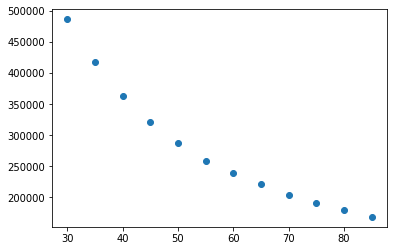

In [ ]:
elbow_plot = np.array(elbow_plot)

plt.scatter(elbow_plot[:,0], elbow_plot[:,1])

for index in range(1,6):
  first_slope = (elbow_plot[index-1][1] - elbow_plot[index][1]) / elbow_plot[index-1][0] - elbow_plot[index][0]
  second_slope = (elbow_plot[index][1] - elbow_plot[index+1][1]) / elbow_plot[index][0] - elbow_plot[index+1][0]
  change_in_slope = first_slope-second_slope
  print(change_in_slope)

In [ ]:
  kmeans = KMeans(n_clusters=55, random_state=42)
  kmeans.fit(df_ing_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=55, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_ing = pd.DataFrame(data_embed)
df_ing.columns=['x','y']
df_ing['word'] = unique_ing
df_ing['cluster'] = kmeans.labels_
df_ing.to_csv('d3-scatterplot/ing.tsv', sep='\t', index=False)


In [ ]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'ing.tsv'
height =  1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

In [ ]:
# create dict
dictionary_clusters = dict(zip(unique_ing, kmeans.labels_))
dictionary_clusters

{'gevalia_dark_roast': 42,
 'kikkoman_sweet_and_sour_sauce': 18,
 'button_mushrooms': 27,
 'yellow_apple': 19,
 'paper_baking_cup': 51,
 'gemelli_pasta': 49,
 'cooked_chicken': 24,
 'beef_tips': 8,
 'cocacola': 22,
 'regular_hamburger': 21,
 'pimenton': 37,
 'brown_bouquet_sauce': 12,
 'reducedfat_graham_cracker_crumbs': 51,
 'dried_papaya': 54,
 'hot_mustard': 41,
 'shortcrust_pastry_dough': 46,
 'green_bell_pepper': 27,
 'soup_mix': 41,
 'rolled_barley': 49,
 'truffle_oil': 40,
 'whole_wheat_bread_cubes': 18,
 'regular_grind_coffee': 29,
 'nosugaradded_tomato_paste': 42,
 'nonfat_fudge_sauce': 37,
 'creole_mustard': 33,
 'sevengrain_cereal': 54,
 'glutenfree_tamari': 11,
 'chiliinfused_vodka': 4,
 'garlicinfused_olive_oil': 16,
 'roasted_garlic_and_herb_pasta_sauce': 46,
 'prepared_hot_mustard': 11,
 'white_syrup': 7,
 'orange_preserves': 25,
 'umeboshi_vinegar': 4,
 'powdered_ginger': 23,
 'whipped_cream_powder': 12,
 'fresh_pineapple_chunks': 22,
 'whole_boneless_skinless_chicken_b

In [ ]:
closest1 = model.wv.most_similar(positive=['ground_beef','healthy'], topn = 2)
closest2 = model.wv.most_similar(positive=['mayonnaise','healthy'],  topn = 2)
closest3 = model.wv.most_similar(positive=['granulated_sugar','healthy'], topn = 2)
closest12 = model.wv.most_similar(positive=['butter','healthy'], topn = 2)
closest11 = model.wv.most_similar(positive=['vanilla_ice_cream','healthy'], topn = 2)


closest4 = model.wv.most_similar(positive=['ground_beef'] ,negative=['unhealthy'], topn = 2)
closest5 = model.wv.most_similar(positive=['mayonnaise'], negative = ['unhealthy'],  topn = 2)
closest6 = model.wv.most_similar(positive=['granulated_sugar'], negative=['unhealthy'], topn = 2)
closest7 = model.wv.most_similar(positive=['butter'], negative=['unhealthy'], topn = 2)
closest8 = model.wv.most_similar(positive=['vanilla_ice_cream','healthy'], negative=['unhealthy'], topn = 2)
closest9 = model.wv.most_similar(positive=['vodka','healthy'], negative=['unhealthy'], topn = 2)

print("ground_beef:", closest1)
bool1 = dictionary_clusters[closest1[0][0]] == dictionary_clusters["ground_beef"] 
bool2 = dictionary_clusters[closest1[1][0]] == dictionary_clusters["ground_beef"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("mayonnaise", closest2)
bool1 = dictionary_clusters[closest2[0][0]] == dictionary_clusters["mayonnaise"] 
bool2 = dictionary_clusters[closest2[1][0]] == dictionary_clusters["mayonnaise"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()

print("granulated_sugar", closest3)

bool1 = dictionary_clusters[closest3[0][0]] == dictionary_clusters["granulated_sugar"] 
bool2 = dictionary_clusters[closest3[1][0]] == dictionary_clusters["granulated_sugar"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()

print("butter", closest12)
bool1 = dictionary_clusters[closest12[0][0]] == dictionary_clusters["butter"] 
bool2 = dictionary_clusters[closest12[1][0]] == dictionary_clusters["butter"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("vanilla_ice_cream",closest11)
bool1 = dictionary_clusters[closest11[0][0]] == dictionary_clusters["vanilla_ice_cream"] 
bool2 = dictionary_clusters[closest11[1][0]] == dictionary_clusters["vanilla_ice_cream"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("ground_beef", closest4)
bool1 = dictionary_clusters[closest4[0][0]] == dictionary_clusters["ground_beef"] 
bool2 = dictionary_clusters[closest4[1][0]] == dictionary_clusters["ground_beef"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("mayonnaise", closest5)
bool1 = dictionary_clusters[closest5[0][0]] == dictionary_clusters["mayonnaise"] 
bool2 = dictionary_clusters[closest5[1][0]] == dictionary_clusters["mayonnaise"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("granulated_sugar", closest6)
bool1 = dictionary_clusters[closest6[0][0]] == dictionary_clusters["granulated_sugar"] 
bool2 = dictionary_clusters[closest6[1][0]] == dictionary_clusters["granulated_sugar"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("butter",closest7)
bool1 = dictionary_clusters[closest7[0][0]] == dictionary_clusters["butter"] 
bool2 = dictionary_clusters[closest7[1][0]] == dictionary_clusters["butter"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("vanilla_ice_cream", closest8)
bool1 = dictionary_clusters[closest8[0][0]] == dictionary_clusters["vanilla_ice_cream"] 
bool2 = dictionary_clusters[closest8[1][0]] == dictionary_clusters["vanilla_ice_cream"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))
print()


print("vodka", closest9)
bool1 = dictionary_clusters[closest9[0][0]] == dictionary_clusters["vodka"] 
bool2 = dictionary_clusters[closest9[1][0]] == dictionary_clusters["vodka"] 
print("same cluster? " + str(bool1) +", "+ str(bool2))

print()


ground_beef: [('oregano', 0.7765539884567261), ('dried_italian_herb_seasoning', 0.7265777587890625)]
same cluster? True, True

mayonnaise [('lowfat_mayonnaise', 0.7555098533630371), ('light_mayonnaise', 0.7505925893783569)]
same cluster? False, False

granulated_sugar [('dark_brown_sugar', 0.8073523044586182), ('honey', 0.806056797504425)]
same cluster? True, False

butter [('flour', 0.8001609444618225), ('salt', 0.7963977456092834)]
same cluster? True, True

vanilla_ice_cream [('pomegranate_liqueur', 0.8407891988754272), ('silken_tofu', 0.8369642496109009)]
same cluster? False, False

ground_beef [('coarse_ground_beef', 0.8133491277694702), ('beans_in_chili_sauce', 0.7182891368865967)]
same cluster? False, False

mayonnaise [('fatfree_mayonnaise', 0.7366032600402832), ('light_mayonnaise', 0.7335489988327026)]
same cluster? False, False

granulated_sugar [('golden_brown_sugar', 0.6350647211074829), ('unsulphured_molasses', 0.6120931506156921)]
same cluster? False, False

butter [('crus

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
closest1 = model.wv.most_similar(positive=['ground_beef'] ,negative=['bad_emissions'], topn = 2)
closest12 = model.wv.most_similar(positive=['pork_spareribs'],negative=['bad_emissions'], topn = 2)


closest2 = model.wv.most_similar(positive=['chocolate'] ,negative=['bad_emissions'], topn = 2)
closest3 = model.wv.most_similar(positive=['shrimp'] ,negative=['bad_emissions'], topn = 2)
closest4 = model.wv.most_similar(positive=['olive_oil'],negative=['bad_emissions'], topn = 2)
closest5 = model.wv.most_similar(positive=['cheddar_cheese'],negative=['bad_emissions'], topn = 2)


print("ground_beef: ", closest1)
bool1 = dictionary_clusters[closest1[0][0]] == dictionary_clusters["ground_beef"] 
bool2 = dictionary_clusters[closest1[1][0]] == dictionary_clusters["ground_beef"] 

print("same cluster? " + str(bool1) +", "+ str(bool2))

print()
print("pork_spareribs",closest12)
print()
print("chocolate",closest2)
print()
print("shrimp",closest3)
print()
print("olive oil",closest4)
print()
print("cheddar_cheese",closest5)
print()

ground_beef:  [('coarse_ground_beef', 0.7454686164855957), ('smoked_meat', 0.7373917698860168)]
same cluster? False, False

pork_spareribs [('leek_white', 0.845910906791687), ('pork_sirloin_chops', 0.8171248435974121)]

chocolate [('rhubarb', 0.8192039728164673), ('bananas', 0.8008161187171936)]

shrimp [('napa_cabbage', 0.7672025561332703), ('snow_peas', 0.7572351098060608)]

olive oil [('double_bouillon_cubes', 0.8381175994873047), ('fresh_ginger', 0.7472182512283325)]

cheddar_cheese [('salisbury_steaks_in_gravy', 0.751731276512146), ('canned_whole_potatoes', 0.6530062556266785)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
hyp_2_1 = model.similarity('turkey_broth','chicken_broth')
hyp_2_2 = model.similarity('turkey_broth','turkey')

print(hyp_2_1)
print(hyp_2_2)

0.5186546
0.6669638


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [ ]:
closest2 = model.wv.most_similar(positive=['walnuts'] ,negative=['expensive'], topn = 2)
closest3 = model.wv.most_similar(positive=['dried_cherries'] ,negative=['expensive'], topn = 2)
closest4 = model.wv.most_similar(positive=['anchovies'],negative=['expensive'], topn = 2)
closest5 = model.wv.most_similar(positive=['steak'],negative=['expensive'], topn = 2)

closest21 = model.wv.most_similar(positive=['pine_nuts'], topn=9) 

print("pine_nuts",closest2)
print()
print("dried_cherries",closest3)
print()
print("anchovies",closest4)
print()
print("steak",closest5)
print()
print(closest21)


pine_nuts [('apple', 0.6599739789962769), ('purple_tomato', 0.6285254955291748)]

dried_cherries [('brown_cardamom_pods', 0.7333532571792603), ('red_zinfandel_wine', 0.7090716361999512)]

anchovies [('capers', 0.7672717571258545), ('cooked_yellow_rice', 0.6777845621109009)]

steak [('stewing_beef', 0.7825204133987427), ('pork', 0.7763607501983643)]

[('whole_wheat_orzo', 0.8252695202827454), ('kalamata_olive', 0.808152973651886), ('goat_cheese', 0.7983584403991699), ('flat_leaf_parsley', 0.796112060546875), ('polenta', 0.7950897812843323), ('sundried_tomatoes_packed_in_oil', 0.791175127029419), ('lemon_juice_and_zest_of', 0.787418007850647), ('feta', 0.785874605178833), ('basil_leaves', 0.7843408584594727)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
_expensive = ['vanilla', 'walnuts','artichoke','pine_nuts','anchovies','dried_cherries','sun-dried_tomato','parmesan','almond','hazelnut','pecan']

In [ ]:
# closest5 = model.wv.most_similar(positive=['cookies'],negative=['dairy'], topn = 3)
print("steak",closest5)

steak [('fresh_ahi_tuna', 0.8099076747894287), ('oriental_style_baked_tofu', 0.7939009666442871), ('cranberryblackberry_juice', 0.7930307984352112)]


In [ ]:
model.doesnt_match("chicken potato cookie".split())